In [4]:
# General imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import tensorflow as tf
# from sklearn.preprocessing import normalize

# Neurophox imports
from neurophox.numpy import *
from neurophox.tensorflow import *
from neurophox.ml.nonlinearities import cnorm, cnormsq
from neurophox.initializers import *
from neurophox.components import *

In [3]:
class PhaseInitializer(MeshPhaseInitializer):
    """
    User-specified initialization of rectangular and triangular mesh architectures.

    Args:
        phase: Phase to initialize
        units: Input dimension, :math:`N`
    """

    def __init__(self, phase: np.ndarray, units: int):
        self.phase, self.units = phase, units
        super(PhaseInitializer, self).__init__(units, self.phase.shape[0])

    def to_np(self) -> np.ndarray:
        return self.phase.astype(NP_FLOAT)

In [7]:
mzi.BlochMZI(0, 0, False).matrix

array([[0.+0.j, 0.+1.j],
       [0.+1.j, 0.+0.j]])

In [8]:
mesh = RMNumpy(4)

In [10]:
mesh.init

AttributeError: 'RMNumpy' object has no attribute 'init'

In [21]:
nplayer = RMNumpy(21, theta_init_name="random_theta")

In [22]:
inp = np.eye(21)[10]

In [23]:
abs(nplayer.propagate(inp)).squeeze()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.98474950e-01, 4.39024787e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.52879798e-01, 7.75987838e-01, 3.23370878e-01,
        2.9694

Text(0.5, 1.0, 'Propagation for Haar random $\\theta_{n\\ell}$')

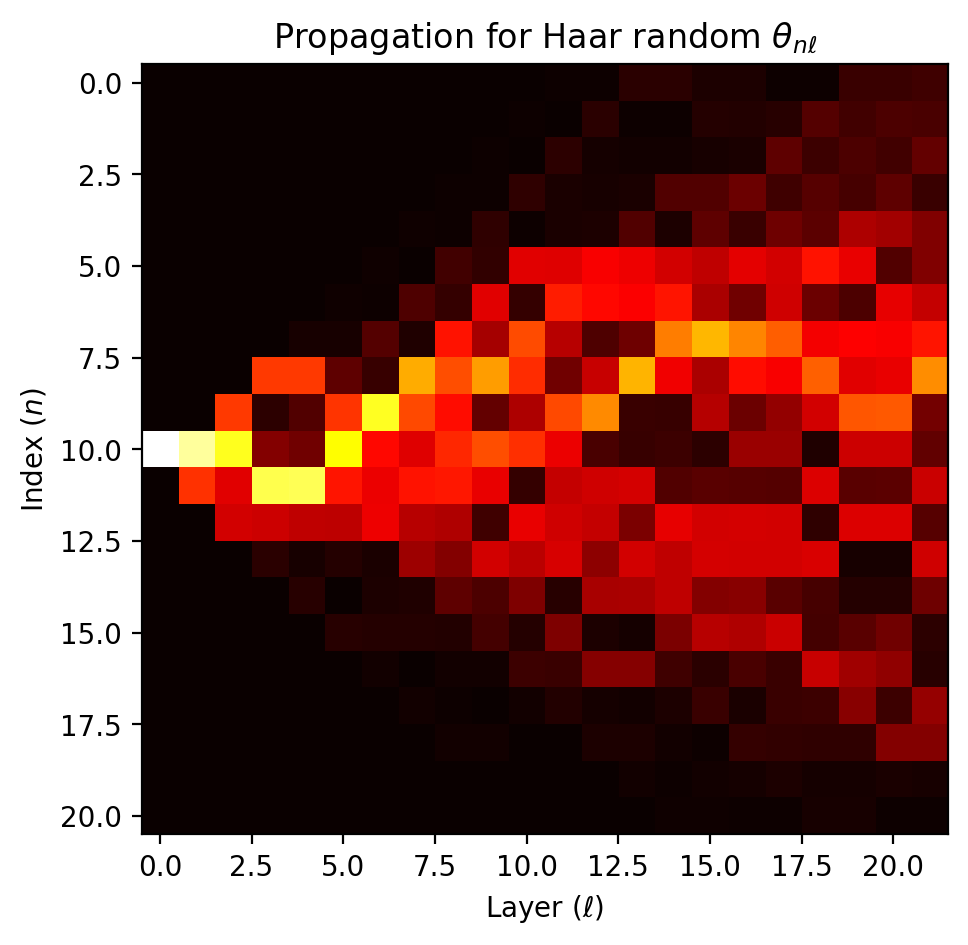

In [24]:
plt.figure(dpi=200, figsize=(10, 5))
plt.imshow(abs(nplayer.propagate(inp)).squeeze().T, cmap='hot')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.title('Propagation for Haar random $\\theta_{n\ell}$')